## **Decision Trees**

* Non-parametric supervised learning methods
* Can learn classification and regression models
* Predicts label based on rules inferred from the features in the training set

#### Tree Algorithms

* ID3
  * Iteratice Dichotomiser 3
  * Creates a multiway tree

* C4.5
  * Succesor to ID3
  * Converts the trained trees into sets of if-then rules

* C5.0
  * Quinlan's latest version release under a proprietary license
  * Uses less memory and builds smaller rulesets

* CART
  * Classification and regression trees
  * Supports numerical target variables (regression) and does not compute rule sets

#### Sklearn Implementation of Trees

* scikit-learn uses an optimized version of the CART algorithm
* however, it does not support categorical variables for now

* Classification --> `sklearn.tree.DecisionTreeClassifier`
* Regression --> `sklearn.tree.DecisionTreeRegressor`

Both these estimators have the same set of parameters except for `criterion` used for tree splitting.


#### Sklearn Tree Parameters

* `splitter`
  * Strategy for splitting at each node -- `best`, `random`

* `max_depth` *(int)*
  * Maximum depth of the tree
  * When `None`, the tree expanded until all leaves are pure or they contain less than *min_samples_split* samples.

* `min_samples_split` *(int, float)*
  * The minimum no. of samples required to split and internal node
  * default = 2

* `min_samples_leaf` *(int, float)*
  * The minimum no. of samples required to be at a leaf node
  * default = 1

* `criterion`
  * Specifies function to measure the quality of a split
  * Classification
    * `gini` (default)
    * `entropy`
  * Regression
    * `squared_error` (default)
    * `friedman_mse`
    * `absolute_error`
    * `poisson`

#### Tree Visualization

`sklearn.tree.plot_tree`

Parameters:

* `decision_tree` The decision tree to be plotted
* `max_depth` The maximum depth of the representation. If *none*, the tree is fully generated
* `feature_names` Name of each of the feature [*default = none*]
* `class_names` Name of each of the target classes in ascending numerical order. [*default = none*]
* `label` Whether to show informative labels for impurity [*default = none*]


#### Avoiding Overfitting of Trees

* Pre-Pruning
  * Uses hyper-parameter search like `GridSearchCV` for finding the best set of parameters

* Post-pruning
  * First grows trees without any constraints and then uses `cost_complexity_pruning` with `max_depth` and `min_samples_split`

#### Tips for Practical Usage

* Decision trees tend to **overfit** data with a large number of features. Make sure that we have the right ratio of samples to number of features.

* Perform **dimensionality reduction** (PCA, or Feature Selection) on a data before using it for training the trees. It gives a better chance of finding discriminative features.

* **Visualize** the trained tree by using `max_depth = 3` as an initial tree depth to get a feel for the fitment and then increase the depth.

* Balance the dataset before training to prevent the tree from being biased toward the classes that are dominant.

* Use `min_samples_split` or `min_samples_leaf` to ensure that multiple samples influence every decision in the tree, by controlling which splits will be considered.
  * A very small number will usually mean the tree will overfit.
  * A large number will prevent the tree from learning the data.

## **Decision Trees For Regression**

Decision Trees are capable of finding complex nonlinear relationships in the data. They can perform both classification and regression tasks.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, ShuffleSplit, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree

In [3]:
np.random.seed(306)

In [4]:
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

#### Load The Dataset

In [5]:
# Load the Dataset

X, y = fetch_california_housing(as_frame = True, return_X_y = True)

trainX, x_test, trainY, y_test = train_test_split(X, y, random_state = 42)

x_train, X_dev, y_train, y_dev = train_test_split(trainX, trainY, random_state = 42)

#### Model Setup

In [11]:
# Model Setup

pipeDT = Pipeline([
    ('scale', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=3, random_state = 42))
])

DT_cv_results = cross_validate( pipeDT, trainX, trainY, cv = cv, scoring = 'neg_mean_absolute_error', return_train_score = True, return_estimator = True)

train_error = -1 * DT_cv_results['train_score']
test_error = -1 * DT_cv_results['test_score']

print(f'Train Error: {train_error.mean()}')
print(f'Test Error: {test_error.mean()}')

Train Error: 0.5895995682120934
Test Error: 0.5926692636750868


#### Visualizing The Tree

In [ ]:
# Visualizing The Tree

pipeDT.fit(x_train, y_train)

##### 1. As a Tree Diagram

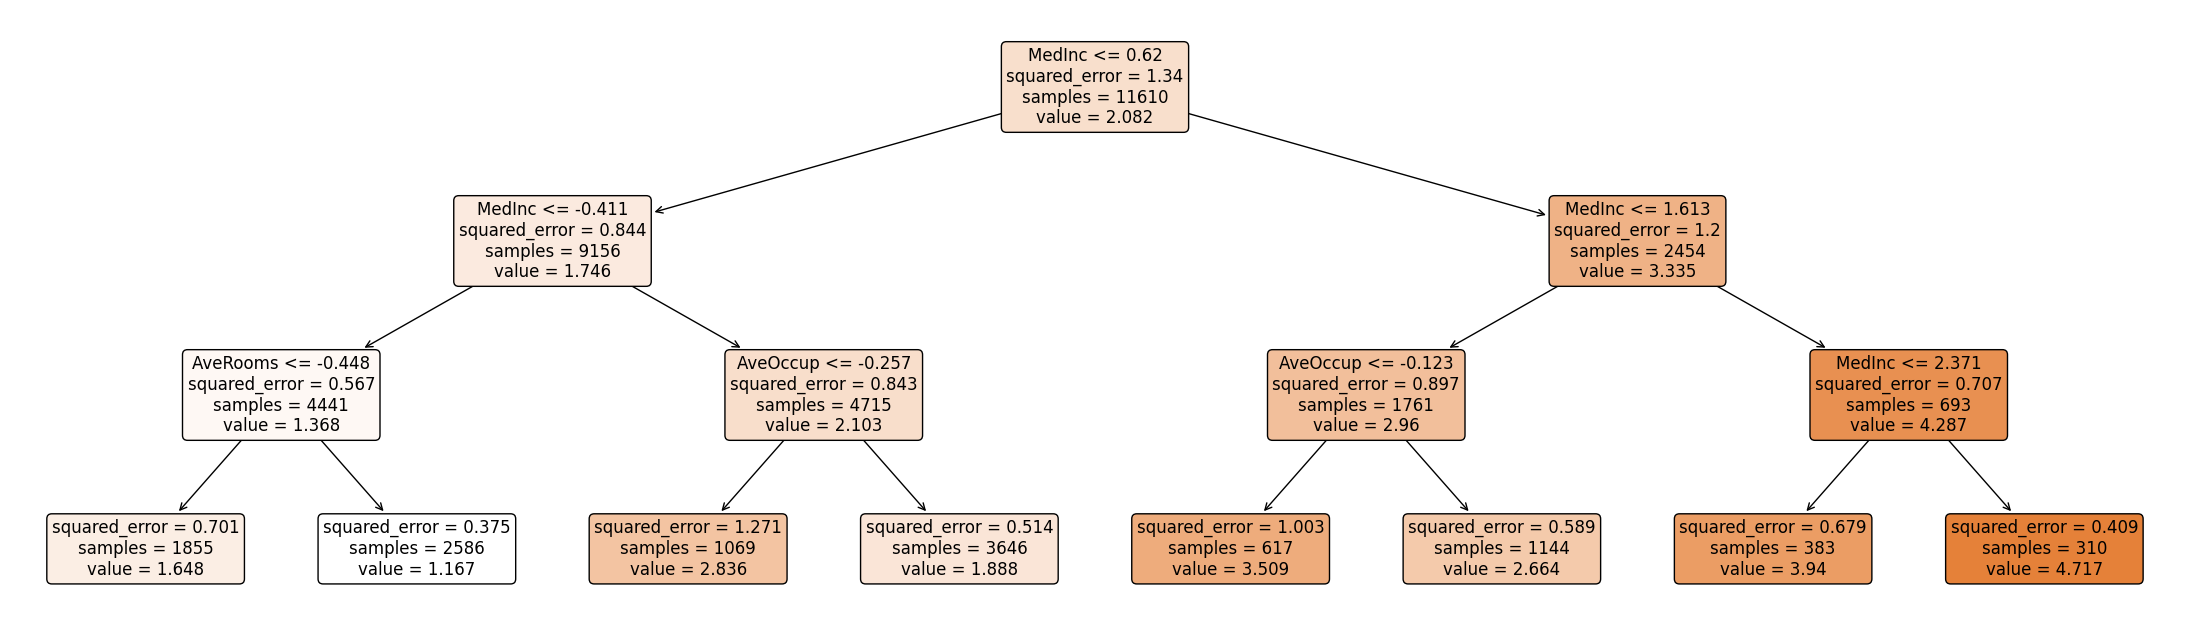

In [13]:
plt.figure(figsize = (28,8), facecolor = 'w')

# create the tree plot
a = tree.plot_tree(pipeDT[-1], feature_names = X.columns, rounded = True, filled = True, fontsize = 12)

# show the plot
plt.show()

##### 2. As a Text Based Diagram

In [14]:
# export the decision tree
tree_rules = export_text(pipeDT[-1])

# print the result
print(tree_rules)

|--- feature_0 <= 0.62
|   |--- feature_0 <= -0.41
|   |   |--- feature_2 <= -0.45
|   |   |   |--- value: [1.65]
|   |   |--- feature_2 >  -0.45
|   |   |   |--- value: [1.17]
|   |--- feature_0 >  -0.41
|   |   |--- feature_5 <= -0.26
|   |   |   |--- value: [2.84]
|   |   |--- feature_5 >  -0.26
|   |   |   |--- value: [1.89]
|--- feature_0 >  0.62
|   |--- feature_0 <= 1.61
|   |   |--- feature_5 <= -0.12
|   |   |   |--- value: [3.51]
|   |   |--- feature_5 >  -0.12
|   |   |   |--- value: [2.66]
|   |--- feature_0 >  1.61
|   |   |--- feature_0 <= 2.37
|   |   |   |--- value: [3.94]
|   |   |--- feature_0 >  2.37
|   |   |   |--- value: [4.72]



#### Using the Tree For Prediction

In [15]:
test_predict = pipeDT.predict(x_test)

#### Evaluating The Tree

In [16]:
mean_absolute_error(y_test, test_predict)

0.6005762942842664

In [17]:
mean_squared_error(y_test, test_predict)

0.6417557936098145

In [18]:
r2_score(y_test, test_predict)

0.5150037690483743

#### HyperParameter Tuning

In [19]:
param_grid = {
    'regressor__max_depth' : range(1,20),
    'regressor__min_samples_split' : range(2,8)
}

DT_gs = GridSearchCV(pipeDT, param_grid = param_grid, n_jobs = 2, cv = cv, scoring = 'neg_mean_absolute_error', return_train_score= True)

DT_gs.fit(trainX, trainY)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('regressor',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             n_jobs=2,
             param_grid={'regressor__max_depth': range(1, 20),
                         'regressor__min_samples_split': range(2, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [20]:
MeanTrainError = -1* DT_gs.cv_results_['mean_train_score'][DT_gs.best_index_]
MeanTestError = -1* DT_gs.cv_results_['mean_test_score'][DT_gs.best_index_]

print('Mean Train Error : ', MeanTrainError)
print('Mean Test Error : ', MeanTestError)

Mean Train Error :  0.27823056836739307
Mean Test Error :  0.4283313044233501


In [22]:
print('Best Parameters : ', DT_gs.best_params_)

Best Parameters :  {'regressor__max_depth': 11, 'regressor__min_samples_split': 5}


Let's retrain the model with best parameters :

In [23]:
pipeDT.set_params(regressor__max_depth = 11, regressor__min_samples_split = 5).fit(trainX, trainY)

Pipeline(steps=[('scale', StandardScaler()),
                ('regressor',
                 DecisionTreeRegressor(max_depth=11, min_samples_split=5,
                                       random_state=42))])

In [24]:
test_predict2 = pipeDT.predict(x_test)

In [25]:
mean_absolute_error(y_test, test_predict2)

0.4248952183820017

In [26]:
mean_squared_error(y_test, test_predict2)

0.4154957726373763

In [27]:
r2_score(y_test, test_predict2)

0.6859960039130073

## **Decision Trees For Classification - Abalone**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### Load the Dataset

In [30]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']

abalone = pd.read_csv(data_url, header = None, names = columns)

In [31]:
type(abalone)

pandas.core.frame.DataFrame

#### Examining the Dataset

In [32]:
abalone.shape

(4177, 9)

In [33]:
abalone.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


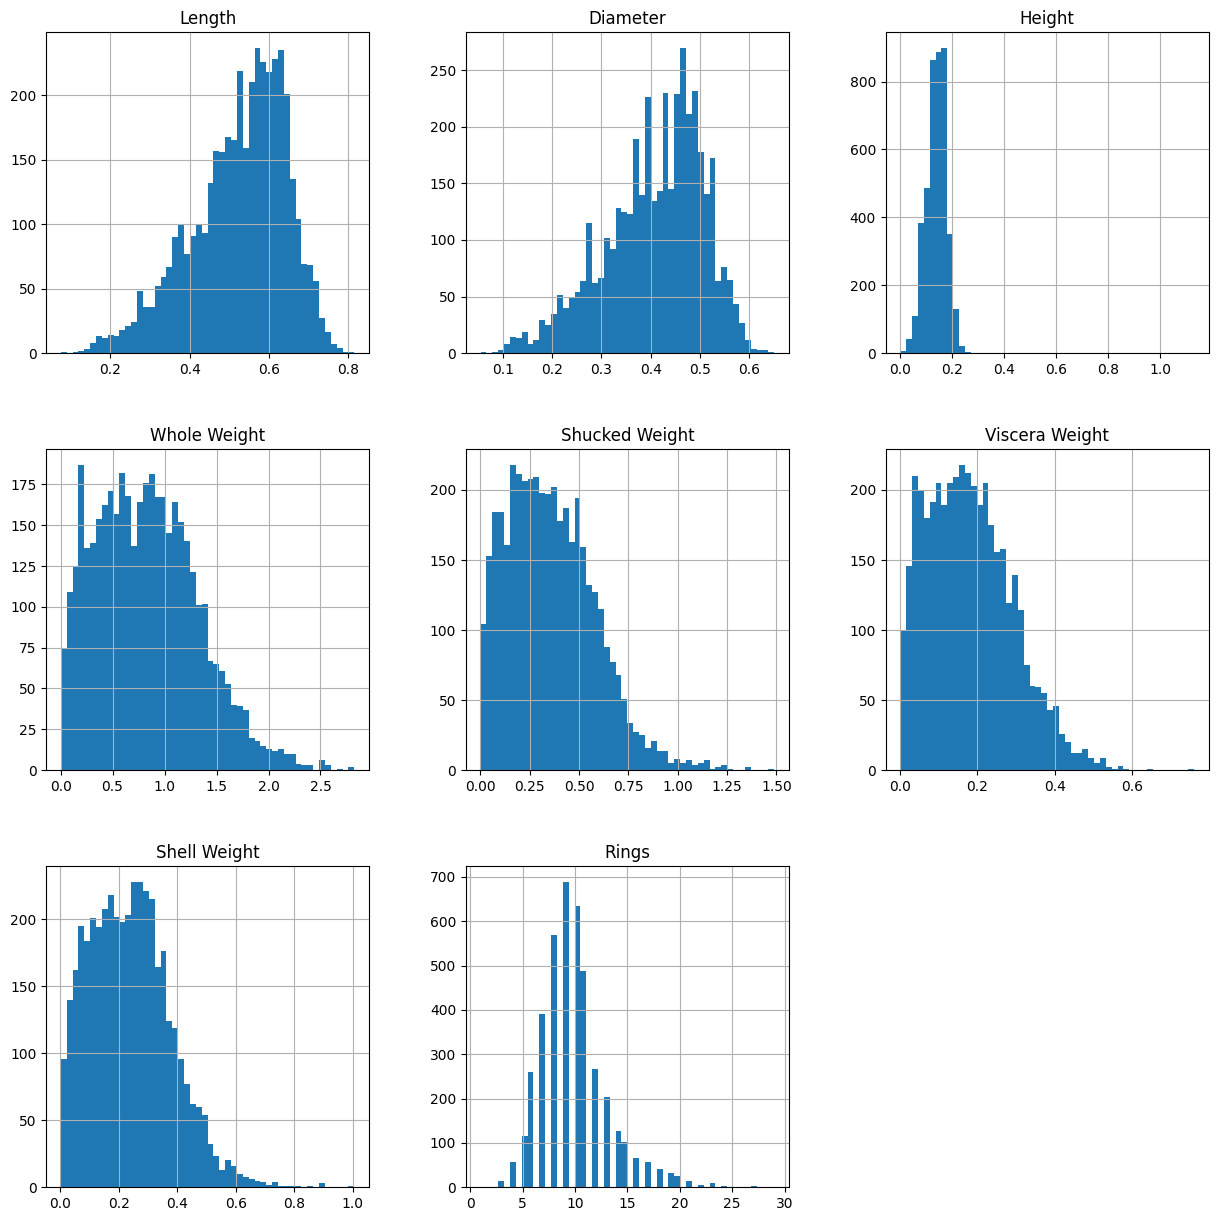

In [34]:
abalone.hist(bins = 50, figsize = (15,15))
plt.show()

<ipython-input-36-8b952bc0d277>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abalone.iloc[:, :-1].corr(), annot = True, square = True)


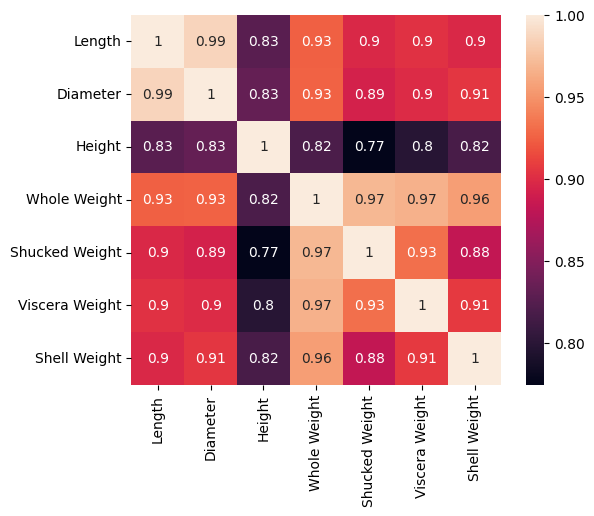

In [36]:
# HEATMAP

plt.figure()
sns.heatmap(abalone.iloc[:, :-1].corr(), annot = True, square = True)
plt.show()

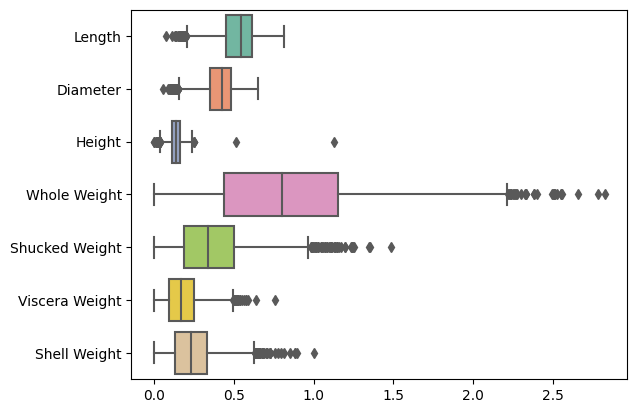

In [37]:
# BOXPLOT

plt.figure()
sns.boxplot(abalone.iloc[:, :-1], orient = 'h', palette = 'Set2')
plt.show()

In [38]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [39]:
abalone.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [40]:
abalone['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

#### Missing Values

In [ ]:
abalone.isnull().sum()

In [42]:
(abalone['Height'] == 0).sum()

2

In [43]:
abalone[abalone['Height'] == 0]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [44]:
means = pd.pivot_table(abalone, index = ['Sex'], aggfunc = {'Height': np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


#### Splitting the Data

In [47]:
X = abalone.iloc[:, :-1]
y = abalone.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#### Pipelining